###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

# Фугоидное движение

Это русская версия материалов курса [**"Practical Numerical Methods with Python!"**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about) Оригинальный курс представляет собой совместный открытый образовательный онлайн-проект, дающий базовое понимание численных методов. Особое внимание уделяется методам численного решения задач, описываемых системами обыкновенных дифференциальных уравнений и дифференциальных уравнений в частных производных. 

В этом ноутбуке описывается постановка задачи, которая будет изучаться в **первом модуле** курса: _фугоидное движение планера_. Рассматривается предыстория вопроса, дается объяснение физическим процессам и создается математическая модель.

Сначала мы рассмотрим эту задачу в упрощенной постановке, когда в отсутствии трения движение сводится к гармоническим колебаниям. Но и в такой постановке удается получить пару интересных траекторий движения планера, что должно подстегнуть воображение для дальнейших свершений. Из следующих ноутбуков мы узнаем, как численно интегрировать дифференциальные уравнения используя метод Эйлера. Но всему свое время. 

Термин "фугоид" используется в аэродинамике для описания режима полета, при котором планер совершает колебательные движения - пикирование и кабрирование - относительно прямолинейной траектории. Многократно повторяющиеся взаимные изменения кинетической и потенциальной энергии приводят к колебаниям по высоте, скорости и углу тангажа, в то время как угол атаки практически не меняется.

Низкоамплитудные колебания можно рассматривать как легкое неудобство в полете, поскольку летательный аппарат не выходит на угол сваливания, а значит ничего серьезного не происходит. Однако у такого движения существует нестационарная мода, при которой аппарат может войти в срывной режим или даже петлю сделать!

В приведенном видео одномоторный самолет Сессна находится в режиме фугоидного движения:

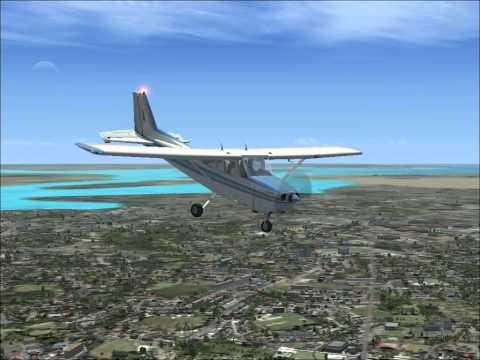

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ysdU4mnRYdM')

Что-то пошло не так! Что же? 

Если летательный аппарат попадает в неустойчивую моду движения, результат может быть еще хуже. Например, один из прототипов самолета на солнечных батареях [NASA's Helios](http://www.nasa.gov/centers/dryden/history/pastprojects/Helios/) потерпел крушение в полете из-за сильных фугоидных колебаний.

Helios был демонстратором технологий - летающее крыло на солнечных батареях. Ему удалось сломать представление о невозможности длительного полета на таком типе движителя - в августе 2001 года на нем был поставлен мировой рекорд высотного полета среди аппаратов без ракетного дигателя. А 26 июня 2003 года сломалось еще что-то. В районе гавайского острова Кауи после попадания в зону турбулентности аппарат начал совершать фугоидные колебания. Скорость осцилляций оказалась выше нормативных значений, и аппарат разрушился над Тихим океаном. К счастью, обошлось без жертв, поскольку он управлялся дистанционно.

## Физика фугоидного движения

При фугоидном движении нос самолета задирается вверх и опускается вниз в то время как аппарат тормозит и ускоряется. Траектория при этом может быть похжа на синусоиду, как на рисунке ниже. Предполагается, что продольная скорость ЛА $v$ изменяется так, что угол атаки остается (почти) постоянным, это в свою очередь означает, что не меняется и коэффициент подъемной силы.

![Image](./figures/oscillatory_trajectory.png)
#### Рисунок 1. Траектория летательного аппарата при фугоидном движении 

На нисходящем участке траектории скорость аппарата увеличивается по мере его снижения с пика до локального минимума $---$ при этом уменьшение потенциальной энергии обеспечивает прирост кинетической. На восходящем участке происходит обратный процесс.

По определению, положительным значениям угла тангажа (угол между строительной осью самолета и горизонтом) соответствуют положения самолета, при которых его нос задран вверх. На отрезках траектории, лежащих ниже центральной линии, угол тангажа $\theta$ увеличивается $\dot{\theta}>0$, а там, где траектория выгнута вверх $---$ $\theta$ уменьшается $\dot{\theta}<0$. Все это отражено на рисунке выше.

Давайте вспомним, какие силы действуют на ЛА в полете. Диаграмма сил для планера без тяги изображена на рисунке ниже, там же обозничены траектория полета и угол наклона траектории $\gamma$ $---$ угол между направлением полета и горизонтом.

![Image](./figures/glider_forces.png)
#### Figure 2. Силы, действующие на планер

Подъемная сила $L$, возникающая при обтекании крыла потоком воздуха, перпендикулярна траектории, сила лобового сопротивления $D$ паралленльна траектории. Эти силы обычно выражаются через коэффициенты подъемной силы и лобового сопротивления $C_L$ и $C_D$ соответственно. Коэффициенты зависят от формы и профилировки крыла и от  _угла атаки_ $---$ угла между хордой крыла и траекторией полета.

Подъемная сила и сопротивление пропорциональны площади крыла $S$ и динамическому давлению $1/2 \rho v^2$, где $\rho$ - плотность воздуха, а $v$ -- скорость ЛА. Уравнения для подъемной силы и сопротивления записываются как:

$$\begin{eqnarray}
L &=& C_L S \times \frac{1}{2} \rho v^2 \\
D &=& C_D S \times \frac{1}{2} \rho v^2
\end{eqnarray}$$

Если планер находится в равновесии, можно записать следующие равенства для сил в продольном и поперечном направлениях:

$$\begin{equation}
L = W \cos \gamma \quad \text{and} \quad D = W \sin \gamma
\end{equation}$$

где через $W$ обозначен вес планера.

На приведенном рисунке привден угол наклона траектории. В данный момент нас не особо заботит его знак, поскольку мы рассматриваем произвольное положение планера для записи баланса сил, действующих на него. Однако в будущем нужно будет отнестись к знакам углов внимательно, иначе это может стать серьезной головной болью. 

Теперь все готово к тому, чтобы написать пару формул.

Но сначала немного окунемся в историю.

## Аэродонетика Ланкастера

Теория фугодиного движения была впервые описана британским инженером Фредериком В. Ланкастером в его монографии "Аэродонетика" (1909). Эта книга настолько старая, что сейчас уже считается публичным достоянием и доступна бесплатно (без СМС) [в Google Books](http://books.google.com/books?id=6hxDAAAAIAAJ&dq=%22phugoid%20theory%20deals%20with%20the%20longitudinal%20stability%22&pg=PA37#v=onepage&q=%22phugoid%20theory%20deals%20with%20the%20longitudinal%20stability%22&f=false).

Ланкастер ввел термин "фугоид" при изучении продольной устойчивости летательного аппарата (_аэродона_). Вначале он рассмотрел первое приближение, когда сопротивление аппарата и его момент инерции пренебрежимо малы. Затем он снял эти ограничения и вывел уравнение устойчивости. В дополнение к описаниям множества экспериментов, проведенных им самим и другими исследователями, Ланкастер пишет о _"численных исследованиях, ... выполненых при помощи 25-сантиметровой логарифмической линейки"_. Go figure!

### Идеальный случай с нулевым сопротивлением

В этом разделе мы будем следовать выкладкам Милн-Томпсона (1966), которые несколько проще подхода, описанного в "Аэродонетике".

Пусть ЛА совершает прямолинейный горизонтальный полет, находясь в равновесии -- подъемная сила равна весу. Скорость такого полета иногда называют _триммерной скоростью_ (триммирование испольлзуется пилотами для того чтобы удерживать органы управления самолетом в положении, соответствующем прямолинейному полету). Обозначим эту скорость как $v_t$, и из условия $L=W$ получим: 

$$\begin{equation}
W = C_L S \times\frac{1}{2} \rho v_t^2
\end{equation}$$

Вес ЛА  $W$ остается постоянным, в то время как подъемная сила при любых полетных условиях зависит от скорости полета $v$. Можно использовать полученное выражение веса через триммерную скорость для получения соотношения  $L/W$ при любой скорости полета:

$$\begin{equation}
\frac{L}{W}= \frac{v^2}{v_t^2}
\end{equation}$$

Представим, что на ЛА подействовал внезапный порыв ветра, в результате которого, он оказался движущимся по криволинейной траектории с мгновенным значением угла $\theta$ и скоростью, отличной триммерную. Схема движения, приведенная на рисунке ниже, должна помочь нам в дальнейших выкладках. Обратите внимание, что угол между траекторией и горизонтом обозначаен $\theta$, причем положительным считается направление против часовой стрелки -- когда самолет набирает высоту (как у Милн-Томпсона)

![Image](./figures/glider_forces_nodrag.png)
#### Рисунок 3. Криволинейная траектория ЛА, набирающего высоту 

При составлении баланса сил нужно учитывать, что мы работаем во вращающейся системе координат - на тело действует центростремительная сила. В радиальном направлении 2-й закон Ньютона выглядит так:

$$\begin{equation}
L- W \cos \theta = \frac{W}{g} \frac{v^2}{R}
\end{equation}$$

где $R$ -- радиус кривизны траектории, а $g$ -- ускорение свободного падения. Если вспомнить выражение для центорстемительного ускорения  $v^2/R$ и преобразовать получившееся уравнение, поделив обе его части на вес и воспользовавшись выражением для отношения $L/W$, получим

$$\begin{equation}
\frac{v^2}{v_t^2}-\cos \theta = \frac{v^2}{g R}
\end{equation}$$

Напомню, что мы рассматриваем упрощенную постановку, в которой отсутствует сопротивление, и поэтому сохраняется полная энергия (так как подъемная сила не совершает работы).
Recall that we simplified the problem assuming that there is no friction, which means that the total energy is constant (the lift does no work). If $z$ represents the depth below a reference horizontal line, the energy per unit mass is (kinetic plus potential energy):

$$\begin{equation}
\frac{1}{2}v^2-g z = \text{constant}
\end{equation}$$

To get rid of that pesky constant, we can choose the reference horizontal line at the level that makes the constant energy equal to zero, so $v^2 = 2 g z$. That helps us re-write the phugoid equation in terms of $z$ as follows:

$$\begin{equation}
\frac{z}{z_t}-\cos \theta = \frac{2z}{R}
\end{equation}$$

Let $ds$ represent a small arc-length of the trajectory. We can write 

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} \quad \text{and}\quad  \sin\theta = -\frac{dz}{ds}
\end{equation}$$

Employing the chain rule of calculus,

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} = \frac{dz}{ds}\frac{d\theta}{dz} = -\sin \theta\frac{d\theta}{dz}
\end{equation}$$

Multiply the phugoid equation by $\frac{1}{2\sqrt{z}}$ to get:

$$\begin{equation}
\frac{\sqrt{z}}{2z_t} - \frac{\cos\theta}{2\sqrt{z}} = \frac{\sqrt{z}}{R}
\end{equation}$$

Substituting for $1/R$ on the right hand side and bringing the cosine term over to the right, we get:

$$\begin{equation}
\frac{\sqrt{z}}{2z_t} = \frac{\cos \theta}{2 \sqrt{z}} - \sqrt{z} \sin \theta \frac{d\theta}{dz}
\end{equation}$$

The right-hand-side is an exact derivative! We can rewrite it as:

$$\begin{equation}
\frac{d}{dz} \left(\sqrt{z}\cos\theta \right) = \frac{\sqrt{z}}{2z_t}
\end{equation}$$

Integrating this equation, we add an arbitrary constant, chosen as $C\sqrt{z_t}$ which (after dividing through by $\sqrt{z}$) gives:

$$\begin{equation}
\cos \theta = \frac{1}{3}\frac{z}{z_t} + C\sqrt{\frac{z_t}{z}}
\end{equation}$$

Taking the derivative of both sides of equation (15) and applying the relations from equation (10) yields:

$$\begin{equation}
\frac{z_t}{R} = \frac{1}{3} - \frac{C}{2}\sqrt{\frac{z_t^3}{z^3}}
\end{equation}$$

Make sure you have followed the derivation, and perhaps write it out on paper!

## Phugoid Curves

Equation (15) is non-linear, which usually means we are hard-pressed to write a clean expression for the variable of interest, $z$.  In fact, Lanchester himself said that he was unable to _"reduce this expression to a form suitable for co-ordinate plotting."_ If the great polymath couldn't do it, we can't either!

But Lanchester _was_ able to plot a suitable approximation of the phugoid flight path using what he called the "trammel" method.  If you're interested in seeing how he did it, his explanation begins on page [48 of Aerodonetics](http://books.google.com/books?id=6hxDAAAAIAAJ&pg=PA49&lpg=PA48&dq=aerodonetics+the+use+of+the+trammel&source=bl&ots=lB6EVKYQuT&sig=aVE2kiDWZoWftaWczMIrcYftMOs&hl=en&sa=X&ei=gTD_U82fGYjzgwT3moGwCQ&ved=0CCAQ6AEwAA#v=onepage&q=aerodonetics%20the%20use%20of%20the%20trammel&f=false).  It's a trip.

Lanchester used Equations (15) and (16) to solve for the constant $C$ and the radius of curvature $R$ and then iteratively plotted small arcs of the phugoid path. By hand.

We wrote a neat little code that duplicates the manual trammel method, but it might be a bit much for you to absorb in the first lesson.  If you want to look it over, you are more than welcome to.  If you are just starting with Python, skip it for the moment and we'll return to it at the end of this module.  

### Plotting the flight path

As we mentioned, we wrote a Python code to reproduce programmatically what Lanchester did graphically. Here's a neat feature of IPython Notebooks: you can run external programs with the magical keyword ... wait for it ... `run`. And the jargon of IPython _is_ to call this "magic." In fact, there are a bunch of [magic functions](http://ipython.org/ipython-doc/dev/interactive/tutorial.html) that you will learn about. They will make you a happy camper.

Let's do it:

In [2]:
%run phugoid.py
%matplotlib inline

This code cell loaded our simulated-trammel code, `phugoid.py`. The code defined a function for you in the background, called `plot_flight_path`, taking three inputs: $z_t$, $z$ and $\theta$.  

Look again at Equation (15), where we take the positive square root. There are several possibilities, depending on the value that the constant $C$ takes. 

* There are no physical solutions for $C>2/3$, because it would result in $\cos\theta>1$. 

* If $C=2/3$, then the solution is a horizontal straight line, because $\cos\theta=1$, $\theta=0$ and $R=\infty$.

* Any value of $C$ for which $0 < C < \frac{2}{3}$ will produce "trochoidal"-like paths.  What does this look like? Let's use our custom function `plot_flight_path` to find out!

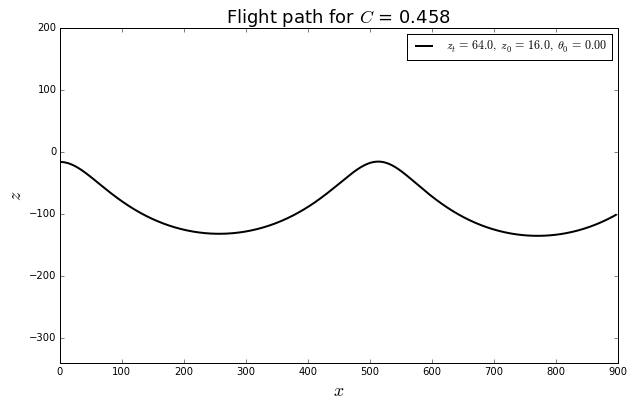

In [3]:
#zt = 64, z = 16, theta=0
plot_flight_path(64, 16, 0)

Cool!  Note that the plot title tells us what the calculated value of $C$ was for our input conditions.  We have a value of $C$ between $0$ and $\frac{2}{3}$ and our path is trochoidal, like we announced it would be.

* For negative values of $C$, the resultant flight path consists of a series of loops.  Let's try it out!

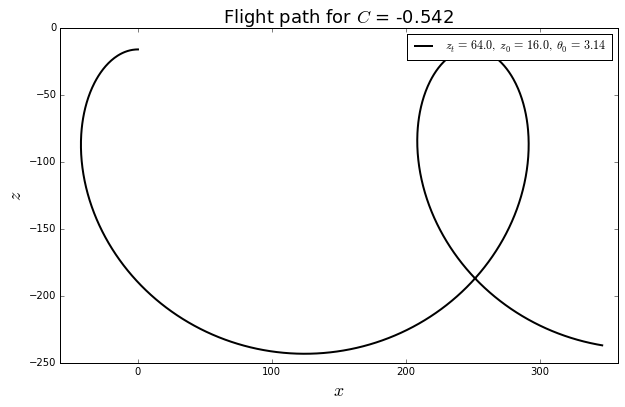

In [4]:
plot_flight_path(64,16,numpy.pi)

You can play around with the input values and see what kind of behavior results.  Just note that any value of $C > \frac{2}{3}$ will result in $\cos \theta > 1$, which doesn't exist.  Python will probably throw a few errors if you hit that condition, but just try again!

* The last case is $C = 0$.  Take another look at Equation (16) and plug in $C = 0$, what should happen? It looks like it will just reduce to 

$$R = 3z_t$$

It's a constant radius of curvature!  In fact, this solution is a series of semi-circles, with a cusp between them. One way to force $C = 0$ that we can figure out from Equation (15), is to make:


$$z = 3z_t\ \ \ ,\ \ \  \theta = 0$$

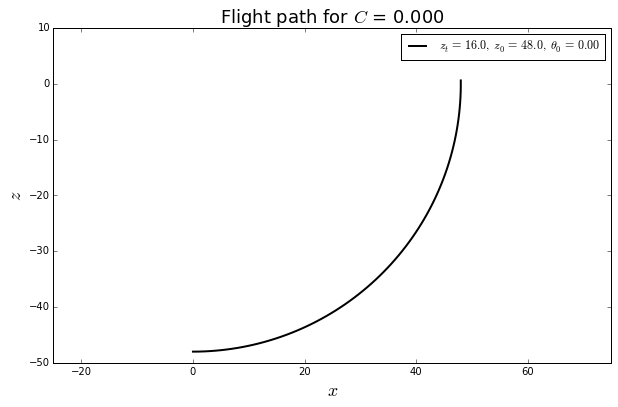

In [5]:
plot_flight_path(16,48,0.)

That looks an awful lot like a quarter circle.  And what's the radius of the arc?  It's $$r = 48 = 3z_t.$$

We can also get a semi-circle out of our simulated trammel by changing to another configuration where $C$ is (near) zero. Here's one example:

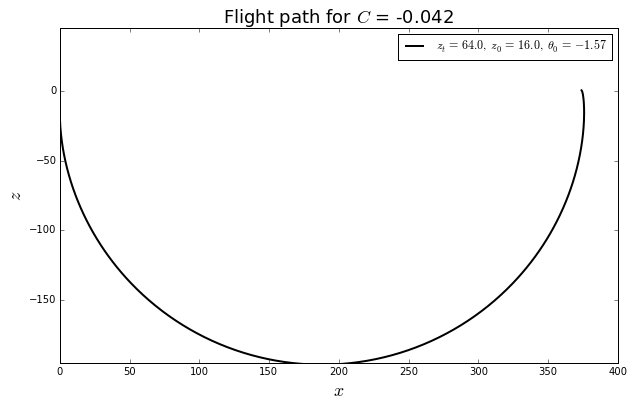

In [6]:
plot_flight_path(64,16,-numpy.pi/2)

That is so nice. We have reproduced the trajectories that Lanchester found more than a hundred years ago, painstakingly drawing them by hand with a contraption called a "trammel." It must have taken him days!

Here is how the different phugoid curves are drawn in von Kármán's book, _Aerodynamics_ (1957). He never says _how_ he drew them, but we're guessing by hand, also. We did pretty good!

![Image](./figures/vonKarman-phugoids.png)

#### Figure 4. Phugoid curves in von Kármán (1957).

In the next notebook of this series, we'll look at the differential equation that arises when you consider small perturbations on the horizontal phugoid, and we'll learn to numerically integrate that to get the flight paths.

## References

1. Lanchester, F. W. _Aerodonetics_, D. van Nostrand Company: New York, 1909. On the public domain. [Get it from Google Books](http://books.google.com/books?id=6hxDAAAAIAAJ&pg=PP1#v=onepage&q&f=false).

2. Milne-Thompson, L. M. _Theoretical Aerodynamics_, Dover 2012 reprint of the revised 1966 edition. [Read on Google Books](http://books.google.com/books?id=EMfCAgAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see section 18.5)

3. Sinha, N. K. and Ananthkrishnan, N. _Elementary Flight Dynamics with an introduction to Bifurcation and Continuation Methods_, CRC Press, 2013. [Read on Google Books](http://books.google.com/books?id=yXL6AQAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see chapter 5)

4. von Kármán, T. _Aerodynamics_, Dover 2004 reprint of the 1957 2nd edition. (see pages 149–151)

---

###### The cell below loads the style of this notebook. 

In [2]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())